## Ejercicios planteados en el cuaderno 1 Introduction DL.ipynb.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
keras.__version__

'2.12.0'

In [ ]:
# Cargamos el conjunto de datos Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
print(X_train_full.shape)
print(X_train_full.dtype)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)
uint8


In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

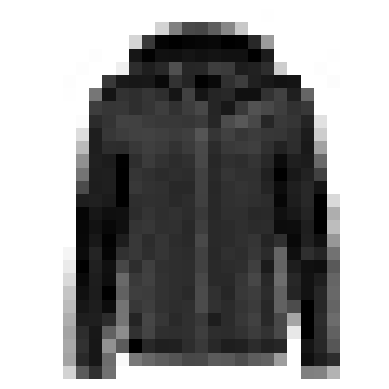

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

In [ ]:
print(X_valid.shape)
print(X_test.shape)

(5000, 28, 28)
(10000, 28, 28)


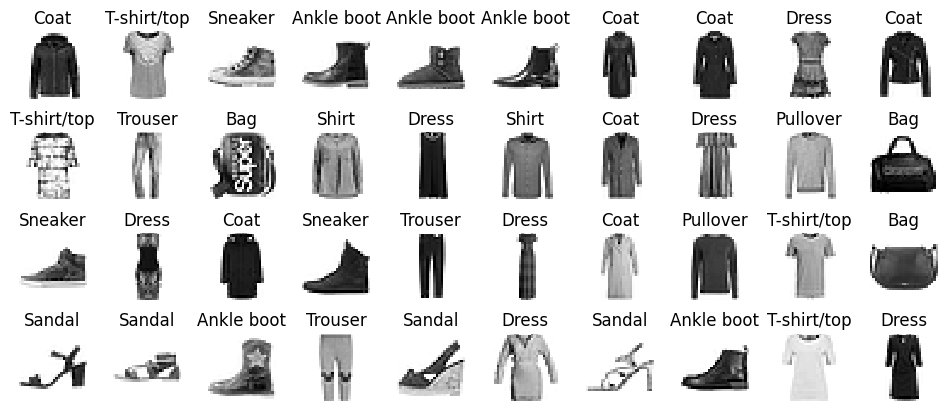

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))#capa de aplanado->convierte imagen en vector
model.add(keras.layers.Dense(300, activation="relu"))#capa densa con 300 neuronas y función de activación relu
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))#la capa de salida utiliza una softmax

In [ ]:
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hidden1 = model.layers[1] #acceder a la primera capa densa
hidden1.name

'dense'

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03658916,  0.05005725,  0.02378541, ...,  0.01656236,
        -0.01204376,  0.0557715 ],
       [-0.01747528, -0.00282545,  0.03758286, ...,  0.03407566,
         0.00034425,  0.04121216],
       [ 0.07433498,  0.0229715 , -0.07215658, ...,  0.03412788,
        -0.02458385,  0.05030967],
       ...,
       [-0.07093763,  0.05649222, -0.04140471, ..., -0.05522225,
         0.02737323,  0.0623191 ],
       [-0.01808037,  0.06379901,  0.03885315, ...,  0.0069263 ,
         0.06502956,  0.01334697],
       [-0.02263863,  0.03142145,  0.00677151, ...,  0.07129173,
        -0.06637318, -0.06170405]], dtype=float32)

In [ ]:
print(weights.shape)
biases

(784, 300)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size = 10,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
5500/5500 [==============================] - 23s 3ms/step - loss: 0.5782 - accuracy: 0.7990 - val_loss: 0.4513 - val_accuracy: 0.8488
Epoch 2/30
5500/5500 [==============================] - 18s 3ms/step - loss: 0.4182 - accuracy: 0.8507 - val_loss: 0.3709 - val_accuracy: 0.8712
Epoch 3/30
5500/5500 [==============================] - 19s 4ms/step - loss: 0.3757 - accuracy: 0.8633 - val_loss: 0.4353 - val_accuracy: 0.8362
Epoch 4/30
5500/5500 [==============================] - 17s 3ms/step - loss: 0.3483 - accuracy: 0.8736 - val_loss: 0.3415 - val_accuracy: 0.8790
Epoch 5/30
5500/5500 [==============================] - 17s 3ms/step - loss: 0.3302 - accuracy: 0.8801 - val_loss: 0.3297 - val_accuracy: 0.8796
Epoch 6/30
5500/5500 [==============================] - 17s 3ms/step - loss: 0.3117 - accuracy: 0.8861 - val_loss: 0.3241 - val_accuracy: 0.8898
Epoch 7/30
5500/5500 [==============================] - 17s 3ms/step - loss: 0.2994 - accuracy: 0.8905 - val_loss: 0.3191 - val_ac

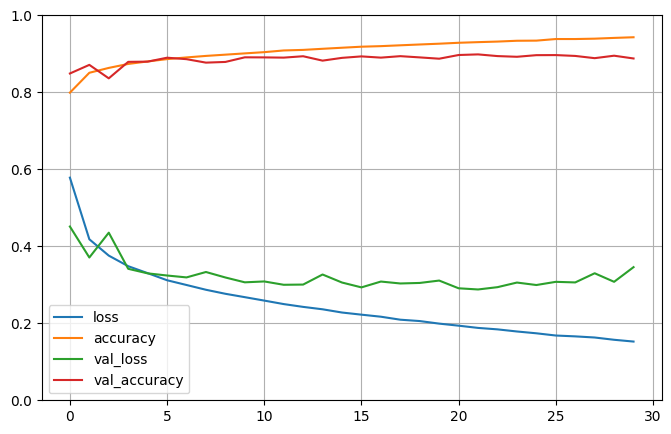

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

### **Batch_size = 32 GPU**



In [ ]:
model32GPU = keras.models.Sequential()
model32GPU.add(keras.layers.Flatten(input_shape=[28, 28]))#capa de aplanado->convierte imagen en vector
model32GPU.add(keras.layers.Dense(300, activation="relu"))#capa densa con 300 neuronas y función de activación relu
model32GPU.add(keras.layers.Dense(100, activation="relu"))
model32GPU.add(keras.layers.Dense(10, activation="softmax"))#la capa de salida utiliza una softmax
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)
model32GPU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model32GPU.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model32GPU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history32GPU = model32GPU.fit(X_train, y_train, epochs=30, batch_size = 32, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7277 - accuracy: 0.7605 - val_loss: 0.5195 - val_accuracy: 0.8208
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4892 - accuracy: 0.8285 - val_loss: 0.4375 - val_accuracy: 0.8518
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4427 - accuracy: 0.8430 - val_loss: 0.5265 - val_accuracy: 0.8018
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4159 - accuracy: 0.8542 - val_loss: 0.3935 - val_accuracy: 0.8664
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3971 - accuracy: 0.8615 - val_loss: 0.3787 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3786 - accuracy: 0.8663 - val_loss: 0.3748 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3669 - accuracy: 0.8709 - val_loss: 0.3695 - val_accuracy:

In [ ]:
H32GPUtime = [6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5]

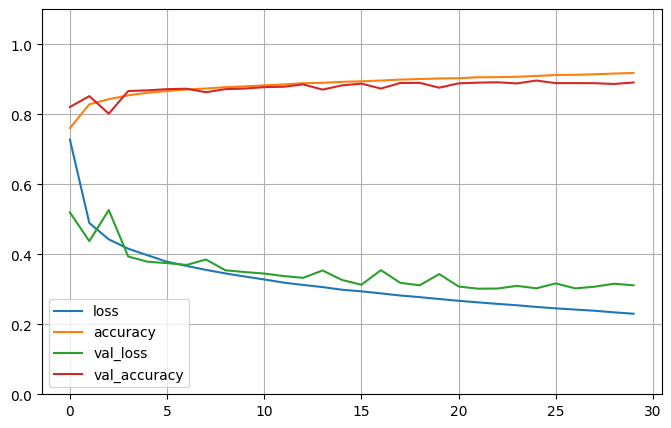

In [ ]:
import pandas as pd

pd.DataFrame(history32GPU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.ylim(0,1.1)
plt.show()

In [ ]:
model32GPU.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8784


[0.34415918588638306, 0.8784000277519226]

### **Batch_size = 64 GPU**

In [ ]:
model64GPU = keras.models.Sequential()
model64GPU.add(keras.layers.Flatten(input_shape=[28, 28]))#capa de aplanado->convierte imagen en vector
model64GPU.add(keras.layers.Dense(300, activation="relu"))#capa densa con 300 neuronas y función de activación relu
model64GPU.add(keras.layers.Dense(100, activation="relu"))
model64GPU.add(keras.layers.Dense(10, activation="softmax"))#la capa de salida utiliza una softmax
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)
model64GPU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model64GPU.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model64GPU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history64GPU = model64GPU.fit(X_train, y_train, epochs=30, batch_size = 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 5s 5ms/step - loss: 0.8768 - accuracy: 0.7272 - val_loss: 0.6062 - val_accuracy: 0.7974
Epoch 2/30
860/860 [==============================] - 4s 4ms/step - loss: 0.5476 - accuracy: 0.8171 - val_loss: 0.4968 - val_accuracy: 0.8324
Epoch 3/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4899 - accuracy: 0.8310 - val_loss: 0.6507 - val_accuracy: 0.7582
Epoch 4/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4585 - accuracy: 0.8413 - val_loss: 0.4338 - val_accuracy: 0.8544
Epoch 5/30
860/860 [==============================] - 3s 3ms/step - loss: 0.4394 - accuracy: 0.8480 - val_loss: 0.4218 - val_accuracy: 0.8552
Epoch 6/30
860/860 [==============================] - 3s 4ms/step - loss: 0.4216 - accuracy: 0.8520 - val_loss: 0.4064 - val_accuracy: 0.8616
Epoch 7/30
860/860 [==============================] - 3s 4ms/step - loss: 0.4086 - accuracy: 0.8577 - val_loss: 0.4092 - val_accuracy: 0.8592
Epoch 

In [ ]:
H64GPUtime = [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
len(H64GPUtime)

30

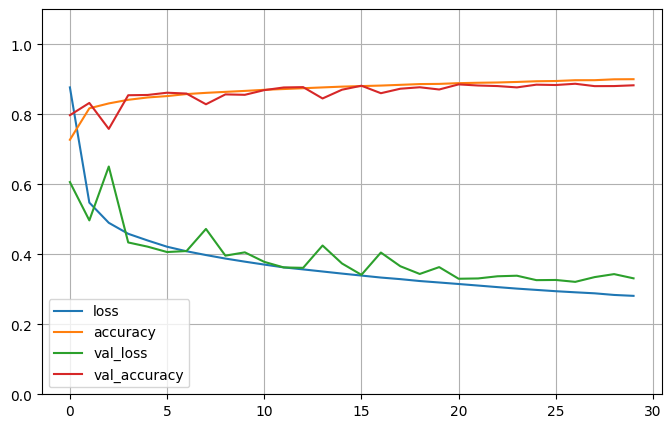

In [ ]:
pd.DataFrame(history64GPU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.ylim(0,1.1)
plt.show()

In [ ]:
model64GPU.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8682


[0.37172263860702515, 0.8682000041007996]

### **Batch_size = 128 GPU**

In [ ]:
model128GPU = keras.models.Sequential()
model128GPU.add(keras.layers.Flatten(input_shape=[28, 28]))#capa de aplanado->convierte imagen en vector
model128GPU.add(keras.layers.Dense(300, activation="relu"))#capa densa con 300 neuronas y función de activación relu
model128GPU.add(keras.layers.Dense(100, activation="relu"))
model128GPU.add(keras.layers.Dense(10, activation="softmax"))#la capa de salida utiliza una softmax
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)
model128GPU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model128GPU.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model128GPU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history128GPU = model128GPU.fit(X_train, y_train, epochs=30, batch_size = 128,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
430/430 [==============================] - 2s 4ms/step - loss: 1.1196 - accuracy: 0.6500 - val_loss: 0.7196 - val_accuracy: 0.7644
Epoch 2/30
430/430 [==============================] - 2s 4ms/step - loss: 0.6509 - accuracy: 0.7865 - val_loss: 0.5808 - val_accuracy: 0.8120
Epoch 3/30
430/430 [==============================] - 2s 4ms/step - loss: 0.5622 - accuracy: 0.8117 - val_loss: 0.5438 - val_accuracy: 0.8166
Epoch 4/30
430/430 [==============================] - 2s 5ms/step - loss: 0.5183 - accuracy: 0.8246 - val_loss: 0.4986 - val_accuracy: 0.8322
Epoch 5/30
430/430 [==============================] - 1s 3ms/step - loss: 0.4923 - accuracy: 0.8313 - val_loss: 0.4687 - val_accuracy: 0.8458
Epoch 6/30
430/430 [==============================] - 1s 3ms/step - loss: 0.4730 - accuracy: 0.8357 - val_loss: 0.4528 - val_accuracy: 0.8494
Epoch 7/30
430/430 [==============================] - 1s 3ms/step - loss: 0.4584 - accuracy: 0.8416 - val_loss: 0.4416 - val_accuracy: 0.8542
Epoch 

In [ ]:
H128GPUtime = [2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2]
len(H128GPUtime)

30

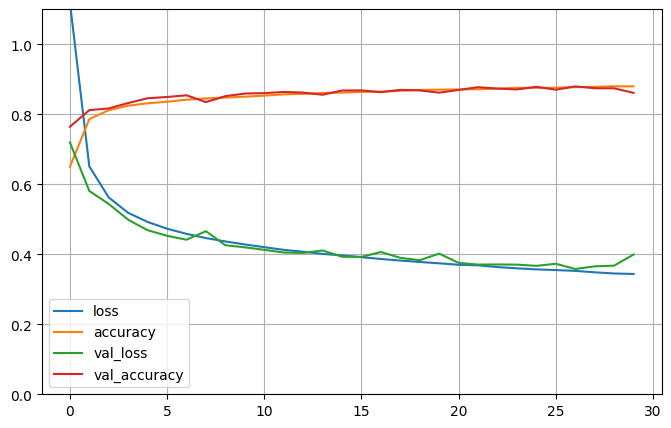

In [ ]:
pd.DataFrame(history128GPU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.ylim(0,1.1)
plt.show()

In [ ]:
model128GPU.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4329 - accuracy: 0.8518


[0.4329124987125397, 0.8518000245094299]

### **Batch_size = 256 GPU**

In [ ]:
model256GPU = keras.models.Sequential()
model256GPU.add(keras.layers.Flatten(input_shape=[28, 28]))#capa de aplanado->convierte imagen en vector
model256GPU.add(keras.layers.Dense(300, activation="relu"))#capa densa con 300 neuronas y función de activación relu
model256GPU.add(keras.layers.Dense(100, activation="relu"))
model256GPU.add(keras.layers.Dense(10, activation="softmax"))#la capa de salida utiliza una softmax
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)
model256GPU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model256GPU.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model256GPU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history256GPU = model256GPU.fit(X_train, y_train, epochs=30, batch_size = 256,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
215/215 [==============================] - 1s 4ms/step - loss: 1.3310 - accuracy: 0.6014 - val_loss: 0.8902 - val_accuracy: 0.7174
Epoch 2/30
215/215 [==============================] - 1s 3ms/step - loss: 0.7935 - accuracy: 0.7453 - val_loss: 0.7036 - val_accuracy: 0.7752
Epoch 3/30
215/215 [==============================] - 1s 3ms/step - loss: 0.6731 - accuracy: 0.7835 - val_loss: 0.6337 - val_accuracy: 0.7990
Epoch 4/30
215/215 [==============================] - 1s 4ms/step - loss: 0.6109 - accuracy: 0.8023 - val_loss: 0.5783 - val_accuracy: 0.8134
Epoch 5/30
215/215 [==============================] - 1s 5ms/step - loss: 0.5714 - accuracy: 0.8126 - val_loss: 0.5458 - val_accuracy: 0.8202
Epoch 6/30
215/215 [==============================] - 1s 5ms/step - loss: 0.5435 - accuracy: 0.8198 - val_loss: 0.5223 - val_accuracy: 0.8280
Epoch 7/30
215/215 [==============================] - 1s 5ms/step - loss: 0.5219 - accuracy: 0.8260 - val_loss: 0.5023 - val_accuracy: 0.8366
Epoch 

In [ ]:
H256GPUtime = [1, 1, 1, 1, 1 , 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 1, 1, 1, 1, 1 ,1, 1, 1, 1, 1]
len(H256GPUtime)

30

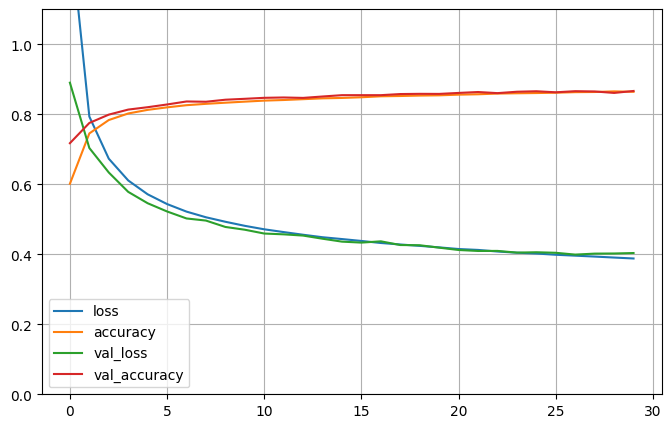

In [ ]:
pd.DataFrame(history256GPU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.ylim(0,1.1)
plt.show()

In [ ]:
model256GPU.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4358 - accuracy: 0.8468


[0.4358014762401581, 0.8468000292778015]

### **Batch_size = 512 GPU**

In [ ]:
model512GPU = keras.models.Sequential()
model512GPU.add(keras.layers.Flatten(input_shape=[28, 28]))#capa de aplanado->convierte imagen en vector
model512GPU.add(keras.layers.Dense(300, activation="relu"))#capa densa con 300 neuronas y función de activación relu
model512GPU.add(keras.layers.Dense(100, activation="relu"))
model512GPU.add(keras.layers.Dense(10, activation="softmax"))#la capa de salida utiliza una softmax
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)
model512GPU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model512GPU.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model512GPU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history512GPU = model512GPU.fit(X_train, y_train, epochs=30, batch_size = 512,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
108/108 [==============================] - 1s 8ms/step - loss: 1.6759 - accuracy: 0.5166 - val_loss: 1.1921 - val_accuracy: 0.6808
Epoch 2/30
108/108 [==============================] - 1s 5ms/step - loss: 1.0191 - accuracy: 0.6945 - val_loss: 0.8717 - val_accuracy: 0.7174
Epoch 3/30
108/108 [==============================] - 1s 5ms/step - loss: 0.8229 - accuracy: 0.7367 - val_loss: 0.7591 - val_accuracy: 0.7612
Epoch 4/30
108/108 [==============================] - 1s 5ms/step - loss: 0.7351 - accuracy: 0.7623 - val_loss: 0.6905 - val_accuracy: 0.7788
Epoch 5/30
108/108 [==============================] - 1s 5ms/step - loss: 0.6808 - accuracy: 0.7789 - val_loss: 0.6464 - val_accuracy: 0.7954
Epoch 6/30
108/108 [==============================] - 1s 5ms/step - loss: 0.6424 - accuracy: 0.7912 - val_loss: 0.6132 - val_accuracy: 0.8044
Epoch 7/30
108/108 [==============================] - 0s 4ms/step - loss: 0.6127 - accuracy: 0.7998 - val_loss: 0.5865 - val_accuracy: 0.8142
Epoch 

In [ ]:
H512GPUtime = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
len(H512GPUtime)

30

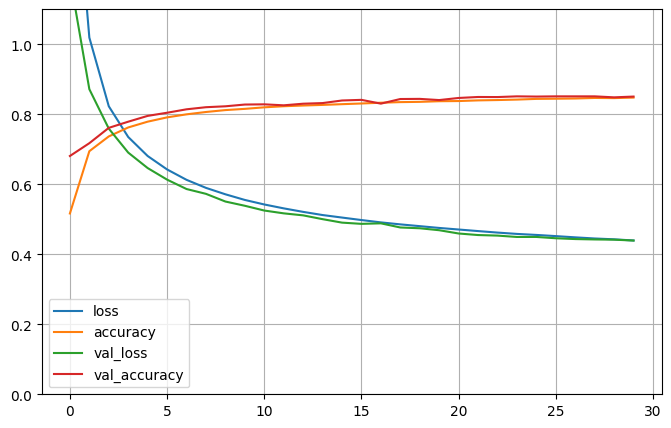

In [ ]:
pd.DataFrame(history512GPU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.ylim(0,1.1)
plt.show()

### Rendiento de los modelos en GPU, con un batch de 32, 64, 128, 256, 512

### Evaluacion con los diferentes batch GPU

In [ ]:
print(model32GPU.evaluate(X_test, y_test))
print(model64GPU.evaluate(X_test, y_test))
print(model128GPU.evaluate(X_test, y_test))
print(model256GPU.evaluate(X_test, y_test))
print(model512GPU.evaluate(X_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.3442 - accuracy: 0.8784
[0.34415918588638306, 0.8784000277519226]
313/313 [==============================] - 1s 3ms/step - loss: 0.3717 - accuracy: 0.8682
[0.37172263860702515, 0.8682000041007996]
313/313 [==============================] - 1s 3ms/step - loss: 0.4329 - accuracy: 0.8518
[0.4329124987125397, 0.8518000245094299]
313/313 [==============================] - 1s 2ms/step - loss: 0.4358 - accuracy: 0.8468
[0.4358014762401581, 0.8468000292778015]
313/313 [==============================] - 1s 2ms/step - loss: 0.4717 - accuracy: 0.8347
[0.4716993570327759, 0.8346999883651733]


Tiempos de ejecucion

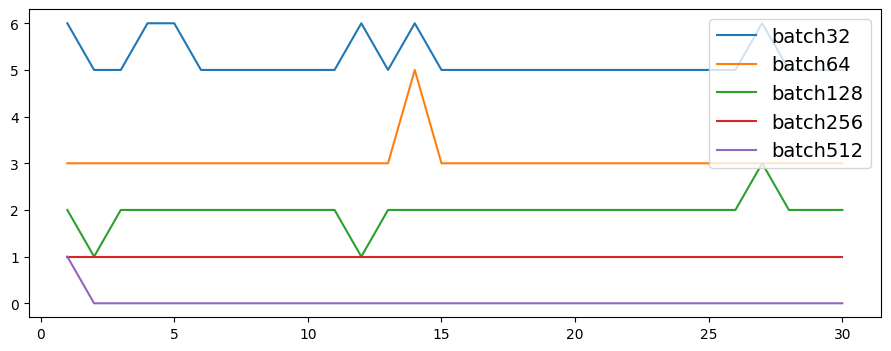

In [ ]:
x = np.arange(1, 31, 1)
plt.figure(figsize=(11,4))
plt.plot(x, H32GPUtime, label="batch32")
plt.plot(x, H64GPUtime, label="batch64")
plt.plot(x, H128GPUtime, label="batch128")
plt.plot(x, H256GPUtime, label="batch256")
plt.plot(x, H512GPUtime, label="batch512")
plt.legend(loc="upper right", fontsize=14)

### **Batch_size = 32 TPU**



In [ ]:
model32TPU = keras.models.Sequential()
model32TPU.add(keras.layers.Flatten(input_shape=[28, 28]))#capa de aplanado->convierte imagen en vector
model32TPU.add(keras.layers.Dense(300, activation="relu"))#capa densa con 300 neuronas y función de activación relu
model32TPU.add(keras.layers.Dense(100, activation="relu"))
model32TPU.add(keras.layers.Dense(10, activation="softmax"))#la capa de salida utiliza una softmax
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)
model32TPU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model32TPU.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model32TPU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history32TPU = model32TPU.fit(X_train, y_train, epochs=30, batch_size = 32, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7218 - accuracy: 0.7607 - val_loss: 0.5209 - val_accuracy: 0.8194
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4870 - accuracy: 0.8291 - val_loss: 0.4394 - val_accuracy: 0.8472
Epoch 3/30
1719/1719 [==============================] - 11s 7ms/step - loss: 0.4436 - accuracy: 0.8426 - val_loss: 0.5611 - val_accuracy: 0.7934
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4173 - accuracy: 0.8532 - val_loss: 0.3982 - val_accuracy: 0.8596
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3989 - accuracy: 0.8600 - val_loss: 0.3783 - val_accuracy: 0.8674
Epoch 6/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3802 - accuracy: 0.8660 - val_loss: 0.3818 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3680 - accuracy: 0.8693 - val_loss: 0.3665 - val_accu

In [ ]:
H32TPUtime = [8, 8, 9, 10, 9, 11, 9, 9, 9, 10, 9, 9, 10, 9, 9, 9, 9, 9, 9, 10, 10, 10, 9, 10, 10, 10, 8, 8, 10, 9]

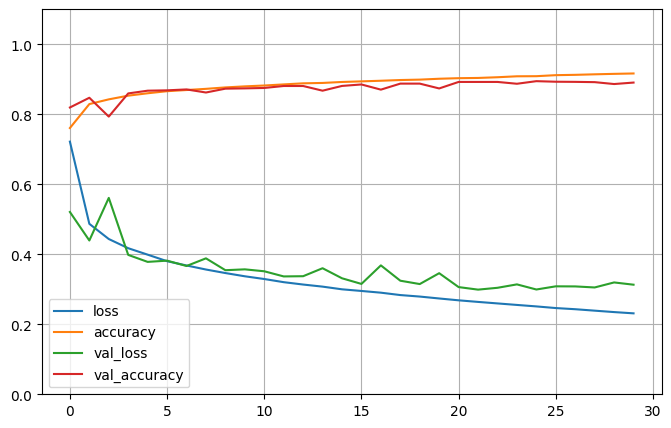

In [ ]:
import pandas as pd

pd.DataFrame(history32TPU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.ylim(0,1.1)
plt.show()

In [ ]:
model32TPU.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3458 - accuracy: 0.8784


[0.345837265253067, 0.8784000277519226]

### **Batch_size = 64 TPU**

In [ ]:
model64TPU = keras.models.Sequential()
model64TPU.add(keras.layers.Flatten(input_shape=[28, 28]))#capa de aplanado->convierte imagen en vector
model64TPU.add(keras.layers.Dense(300, activation="relu"))#capa densa con 300 neuronas y función de activación relu
model64TPU.add(keras.layers.Dense(100, activation="relu"))
model64TPU.add(keras.layers.Dense(10, activation="softmax"))#la capa de salida utiliza una softmax
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)
model64TPU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model64TPU.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model64TPU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history64TPU = model64TPU.fit(X_train, y_train, epochs=30, batch_size = 64,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 7s 8ms/step - loss: 0.8739 - accuracy: 0.7234 - val_loss: 0.6140 - val_accuracy: 0.7884
Epoch 2/30
860/860 [==============================] - 7s 8ms/step - loss: 0.5469 - accuracy: 0.8157 - val_loss: 0.4993 - val_accuracy: 0.8308
Epoch 3/30
860/860 [==============================] - 5s 6ms/step - loss: 0.4873 - accuracy: 0.8310 - val_loss: 0.6690 - val_accuracy: 0.7534
Epoch 4/30
860/860 [==============================] - 7s 8ms/step - loss: 0.4563 - accuracy: 0.8409 - val_loss: 0.4312 - val_accuracy: 0.8540
Epoch 5/30
860/860 [==============================] - 7s 8ms/step - loss: 0.4376 - accuracy: 0.8485 - val_loss: 0.4205 - val_accuracy: 0.8528
Epoch 6/30
860/860 [==============================] - 5s 6ms/step - loss: 0.4200 - accuracy: 0.8530 - val_loss: 0.4056 - val_accuracy: 0.8586
Epoch 7/30
860/860 [==============================] - 6s 7ms/step - loss: 0.4075 - accuracy: 0.8573 - val_loss: 0.4096 - val_accuracy: 0.8604
Epoch 

In [ ]:
H64TPUtime = [6, 6, 6, 6, 6, 5, 6, 7, 8, 7, 6, 6, 7, 7, 7, 7, 7, 6, 7, 7, 6, 7, 6, 6, 6, 5, 7, 6, 8, 6]
len(H64TPUtime)

30

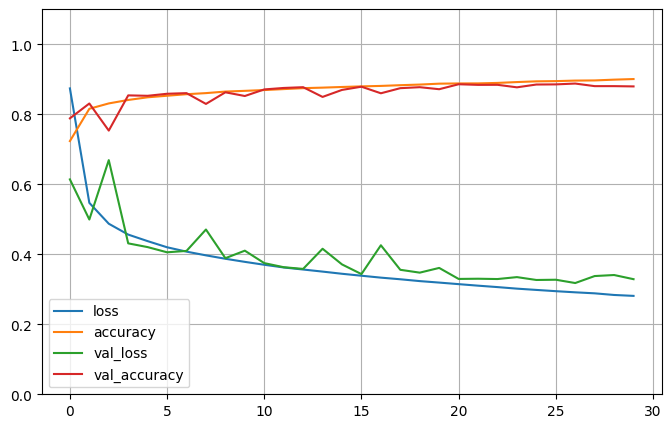

In [ ]:
pd.DataFrame(history64TPU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.ylim(0,1.1)
plt.show()

In [ ]:
model64TPU.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3640 - accuracy: 0.8715


[0.36397483944892883, 0.8715000152587891]

### **Batch_size = 128 TPU**

In [ ]:
model128TPU = keras.models.Sequential()
model128TPU.add(keras.layers.Flatten(input_shape=[28, 28]))#capa de aplanado->convierte imagen en vector
model128TPU.add(keras.layers.Dense(300, activation="relu"))#capa densa con 300 neuronas y función de activación relu
model128TPU.add(keras.layers.Dense(100, activation="relu"))
model128TPU.add(keras.layers.Dense(10, activation="softmax"))#la capa de salida utiliza una softmax
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)
model128TPU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model128TPU.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model128TPU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history128TPU = model128TPU.fit(X_train, y_train, epochs=30, batch_size = 128,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
430/430 [==============================] - 4s 8ms/step - loss: 1.0626 - accuracy: 0.6832 - val_loss: 0.7107 - val_accuracy: 0.7720
Epoch 2/30
430/430 [==============================] - 3s 8ms/step - loss: 0.6470 - accuracy: 0.7915 - val_loss: 0.5767 - val_accuracy: 0.8186
Epoch 3/30
430/430 [==============================] - 4s 10ms/step - loss: 0.5601 - accuracy: 0.8142 - val_loss: 0.5438 - val_accuracy: 0.8178
Epoch 4/30
430/430 [==============================] - 5s 12ms/step - loss: 0.5162 - accuracy: 0.8257 - val_loss: 0.4965 - val_accuracy: 0.8334
Epoch 5/30
430/430 [==============================] - 4s 8ms/step - loss: 0.4908 - accuracy: 0.8319 - val_loss: 0.4654 - val_accuracy: 0.8460
Epoch 6/30
430/430 [==============================] - 3s 8ms/step - loss: 0.4718 - accuracy: 0.8366 - val_loss: 0.4504 - val_accuracy: 0.8510
Epoch 7/30
430/430 [==============================] - 3s 7ms/step - loss: 0.4577 - accuracy: 0.8417 - val_loss: 0.4417 - val_accuracy: 0.8558
Epoc

In [ ]:
H128TPUtime = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 6, 4, 4, 4, 5, 4, 4, 5]
len(H128TPUtime)

30

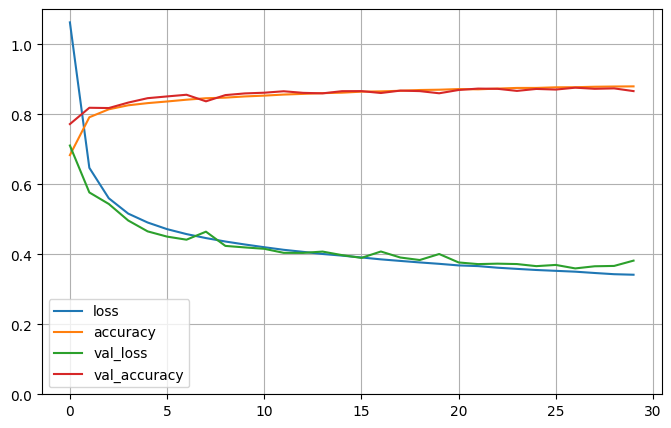

In [ ]:
pd.DataFrame(history128TPU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.ylim(0,1.1)
plt.show()

In [ ]:
model128TPU.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4119 - accuracy: 0.8577


[0.41188350319862366, 0.857699990272522]

### **Batch_size = 256 TPU**

In [ ]:
model256TPU = keras.models.Sequential()
model256TPU.add(keras.layers.Flatten(input_shape=[28, 28]))#capa de aplanado->convierte imagen en vector
model256TPU.add(keras.layers.Dense(300, activation="relu"))#capa densa con 300 neuronas y función de activación relu
model256TPU.add(keras.layers.Dense(100, activation="relu"))
model256TPU.add(keras.layers.Dense(10, activation="softmax"))#la capa de salida utiliza una softmax
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)
model256TPU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model256TPU.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model256TPU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history256TPU = model256TPU.fit(X_train, y_train, epochs=30, batch_size = 256,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
215/215 [==============================] - 3s 12ms/step - loss: 1.2923 - accuracy: 0.6298 - val_loss: 0.8676 - val_accuracy: 0.7316
Epoch 2/30
215/215 [==============================] - 2s 11ms/step - loss: 0.7796 - accuracy: 0.7512 - val_loss: 0.6922 - val_accuracy: 0.7794
Epoch 3/30
215/215 [==============================] - 3s 15ms/step - loss: 0.6639 - accuracy: 0.7863 - val_loss: 0.6252 - val_accuracy: 0.7976
Epoch 4/30
215/215 [==============================] - 4s 18ms/step - loss: 0.6027 - accuracy: 0.8029 - val_loss: 0.5693 - val_accuracy: 0.8164
Epoch 5/30
215/215 [==============================] - 4s 18ms/step - loss: 0.5638 - accuracy: 0.8142 - val_loss: 0.5381 - val_accuracy: 0.8242
Epoch 6/30
215/215 [==============================] - 2s 11ms/step - loss: 0.5369 - accuracy: 0.8198 - val_loss: 0.5161 - val_accuracy: 0.8288
Epoch 7/30
215/215 [==============================] - 2s 11ms/step - loss: 0.5163 - accuracy: 0.8259 - val_loss: 0.4971 - val_accuracy: 0.8390

In [ ]:
H256TPUtime = [3, 3, 3, 4, 3, 4, 3, 4, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4]
len(H256TPUtime)

30

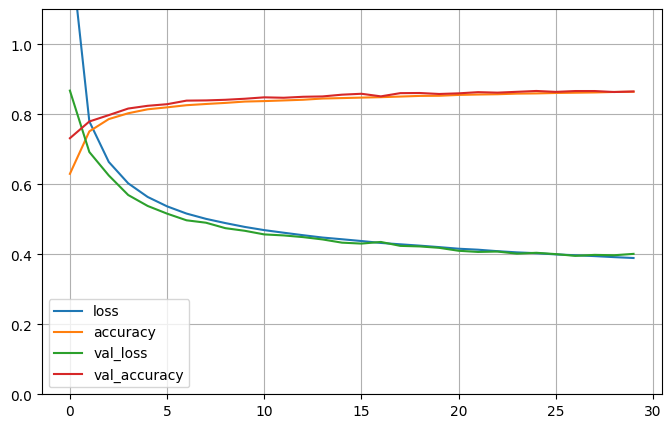

In [ ]:
pd.DataFrame(history256TPU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.ylim(0,1.1)
plt.show()

In [ ]:
model256TPU.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4346 - accuracy: 0.8460


[0.43459755182266235, 0.8460000157356262]

### **Batch_size = 512 TPU**

In [ ]:
model512TPU = keras.models.Sequential()
model512TPU.add(keras.layers.Flatten(input_shape=[28, 28]))#capa de aplanado->convierte imagen en vector
model512TPU.add(keras.layers.Dense(300, activation="relu"))#capa densa con 300 neuronas y función de activación relu
model512TPU.add(keras.layers.Dense(100, activation="relu"))
model512TPU.add(keras.layers.Dense(10, activation="softmax"))#la capa de salida utiliza una softmax
keras.backend.clear_session() #se sugiere limpiar la sesión para liberar los grafos computacionales
np.random.seed(42) #se fija semilla de numpy y tf
tf.random.set_seed(42)
model512TPU = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model512TPU.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

model512TPU.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history512TPU = model512TPU.fit(X_train, y_train, epochs=30, batch_size = 512,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
108/108 [==============================] - 3s 20ms/step - loss: 1.7081 - accuracy: 0.5212 - val_loss: 1.2212 - val_accuracy: 0.6734
Epoch 2/30
108/108 [==============================] - 2s 18ms/step - loss: 1.0470 - accuracy: 0.6917 - val_loss: 0.8975 - val_accuracy: 0.7236
Epoch 3/30
108/108 [==============================] - 2s 18ms/step - loss: 0.8479 - accuracy: 0.7307 - val_loss: 0.7812 - val_accuracy: 0.7534
Epoch 4/30
108/108 [==============================] - 2s 18ms/step - loss: 0.7565 - accuracy: 0.7546 - val_loss: 0.7095 - val_accuracy: 0.7748
Epoch 5/30
108/108 [==============================] - 2s 21ms/step - loss: 0.6988 - accuracy: 0.7725 - val_loss: 0.6618 - val_accuracy: 0.7882
Epoch 6/30
108/108 [==============================] - 3s 29ms/step - loss: 0.6579 - accuracy: 0.7843 - val_loss: 0.6261 - val_accuracy: 0.7944
Epoch 7/30
108/108 [==============================] - 3s 30ms/step - loss: 0.6258 - accuracy: 0.7942 - val_loss: 0.5977 - val_accuracy: 0.8068

In [ ]:
H512TPUtime = [3, 2, 3, 3, 3, 3, 3, 2, 4, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 4, 2, 3, 2, 3, 3, 3, 3]
len(H512TPUtime)

30

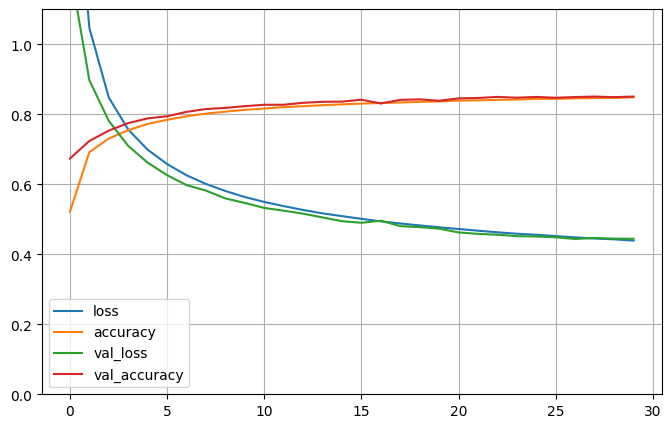

In [ ]:
pd.DataFrame(history512TPU.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.ylim(0,1.1)
plt.show()

In [ ]:
model512TPU.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4775 - accuracy: 0.8345


[0.47753480076789856, 0.8345000147819519]

### Rendiento de los modelos en TPU, con un batch de 32, 64, 128, 256, 512

### Evaluacion con los diferentes batch con TPU

In [ ]:
print(model32TPU.evaluate(X_test, y_test))
print(model64TPU.evaluate(X_test, y_test))
print(model128TPU.evaluate(X_test, y_test))
print(model256TPU.evaluate(X_test, y_test))
print(model512TPU.evaluate(X_test, y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.3458 - accuracy: 0.8784
[0.345837265253067, 0.8784000277519226]
313/313 [==============================] - 1s 4ms/step - loss: 0.3640 - accuracy: 0.8715
[0.36397483944892883, 0.8715000152587891]
313/313 [==============================] - 1s 3ms/step - loss: 0.4119 - accuracy: 0.8577
[0.41188350319862366, 0.857699990272522]
313/313 [==============================] - 1s 3ms/step - loss: 0.4346 - accuracy: 0.8460
[0.43459755182266235, 0.8460000157356262]
313/313 [==============================] - 1s 3ms/step - loss: 0.4775 - accuracy: 0.8345
[0.47753480076789856, 0.8345000147819519]


Tiempos de ejecucion

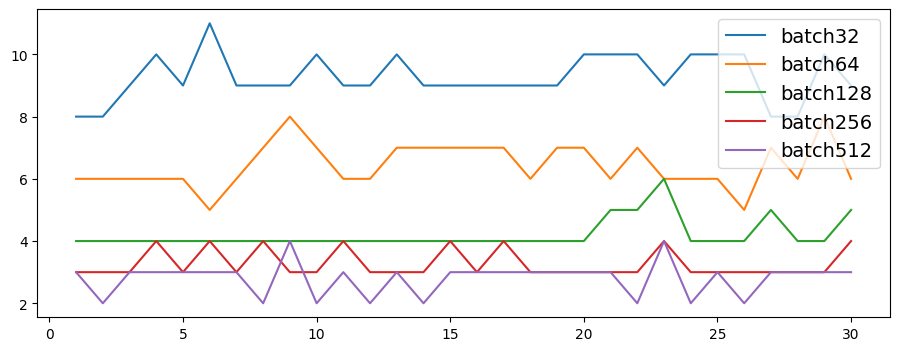

In [ ]:
x = np.arange(1, 31, 1)
plt.figure(figsize=(11,4))
plt.plot(x, H32TPUtime, label="batch32")
plt.plot(x, H64TPUtime, label="batch64")
plt.plot(x, H128TPUtime, label="batch128")
plt.plot(x, H256TPUtime, label="batch256")
plt.plot(x, H512TPUtime, label="batch512")
plt.legend(loc="upper right", fontsize=14)

## Ejercicios planteados en el cuaderno 2 DL Keras API funcional.ipynb.

In [ ]:
import tensorflow as tf

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

4422102/4422102 [==============================] - 1s 0us/step


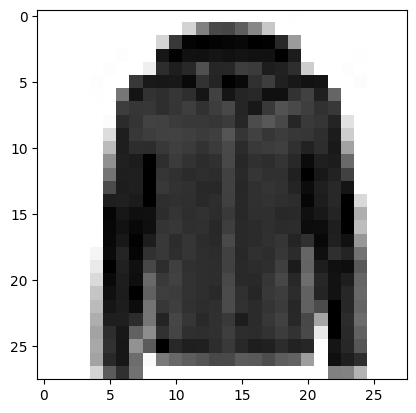

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [ ]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [ ]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 red1 (Dense)                (None, 200)               157000    
                                                                 
 hred2 (Dense)               (None, 50)                10050     
                                                                 
 output (Dense)              (None, 10)                510       
                                                                 
Total params: 167560 (654.53 KB)
Trainable params: 167560 (654.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


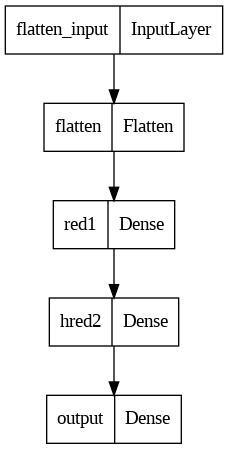

In [ ]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary() # resumen del modelo
tf.keras.utils.plot_model(model) #diagrama del modelo

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 entrada (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 h1 (Dense)                  (None, 200)               157000    
                                                                 
 h2 (Dense)                  (None, 50)                10050     
                                                                 
 output (Dense)              (None, 10)                510       
                                                                 
Total params: 167560 (654.53 KB)
Trainable params: 167560 (654.53 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


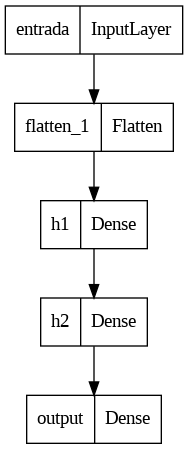

In [ ]:
#arquitectura funcional
#capa de entrada
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
#capa de aplanamiento de las imágenes
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)#argumento de entrada
#capas densas
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)#argumento de entrada
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa de salida
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
#crear modelo según conexiones tipo funcionales
model_fun = tf.keras.Model(inputs=input_l,outputs=output)

#resumen y gráfica del modelo
model_fun.summary()
tf.keras.utils.plot_model(model_fun)

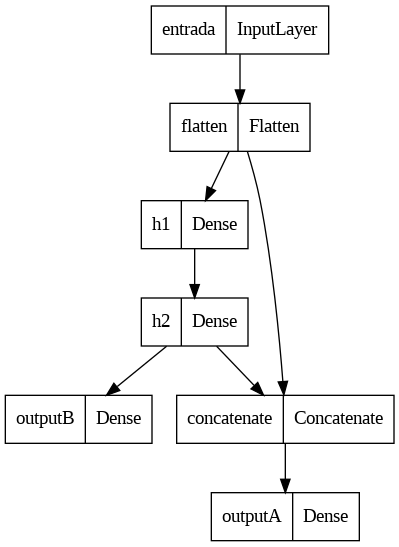

In [ ]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten])
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

In [ ]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics="accuracy") #f1, precision, recall, crossentropy

In [ ]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 [==============================] - 10s 7ms/step - loss: 1.0991 - outputA_loss: 0.5682 - outputB_loss: 0.5309 - outputA_accuracy: 0.8028 - outputB_accuracy: 0.8142 - val_loss: 0.8391 - val_outputA_loss: 0.4253 - val_outputB_loss: 0.4138 - val_outputA_accuracy: 0.8457 - val_outputB_accuracy: 0.8487
Epoch 2/10
657/657 [==============================] - 4s 6ms/step - loss: 0.7952 - outputA_loss: 0.4005 - outputB_loss: 0.3947 - outputA_accuracy: 0.8561 - outputB_accuracy: 0.8568 - val_loss: 0.7594 - val_outputA_loss: 0.3811 - val_outputB_loss: 0.3783 - val_outputA_accuracy: 0.8636 - val_outputB_accuracy: 0.8619
Epoch 3/10
657/657 [==============================] - 3s 5ms/step - loss: 0.7048 - outputA_loss: 0.3555 - outputB_loss: 0.3493 - outputA_accuracy: 0.8718 - outputB_accuracy: 0.8728 - val_loss: 0.7301 - val_outputA_loss: 0.3732 - val_outputB_loss: 0.3568 - val_outputA_accuracy: 0.8652 - val_outputB_accuracy: 0.8717
Epoch 4/10
657/657 [==============================]

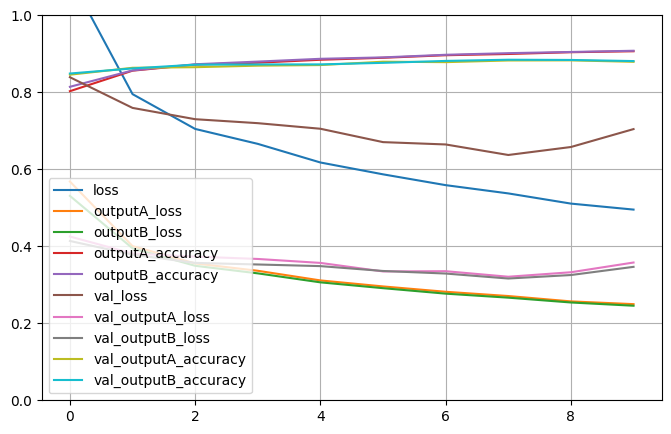

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [ ]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 [==============================] - 1s 2ms/step
(10000, 10) (10000, 10)


In [ ]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [ ]:
scoreA = model_fun.evaluate(Xtest,ytest)#evaluacion
print(scoreA)

313/313 [==============================] - 2s 4ms/step - loss: 0.7622 - outputA_loss: 0.3874 - outputB_loss: 0.3748 - outputA_accuracy: 0.8697 - outputB_accuracy: 0.8737
[0.7622237801551819, 0.38738706707954407, 0.37483659386634827, 0.869700014591217, 0.8737000226974487]


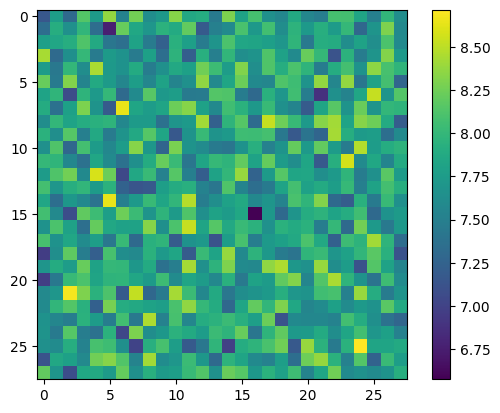

In [ ]:
#se busca identificar las entradas más relevantes para la red
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [ ]:
model.layers[1].get_weights()[1].shape # accediendo a los bias

(200,)

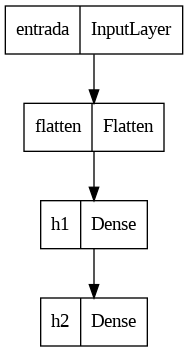

In [ ]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!

In [ ]:
z = model_B.predict(Xtest) # salida en h2
z.shape

313/313 [==============================] - 1s 2ms/step


(10000, 50)

In [ ]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

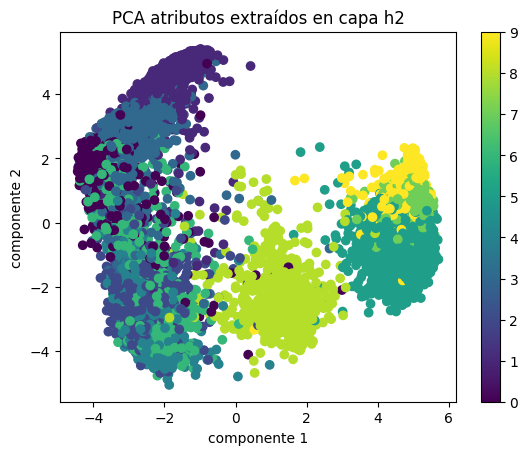

In [ ]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')
plt.show()

In [ ]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

Text(0.5, 1.0, 'PCA atributos extraídos en capa h2')

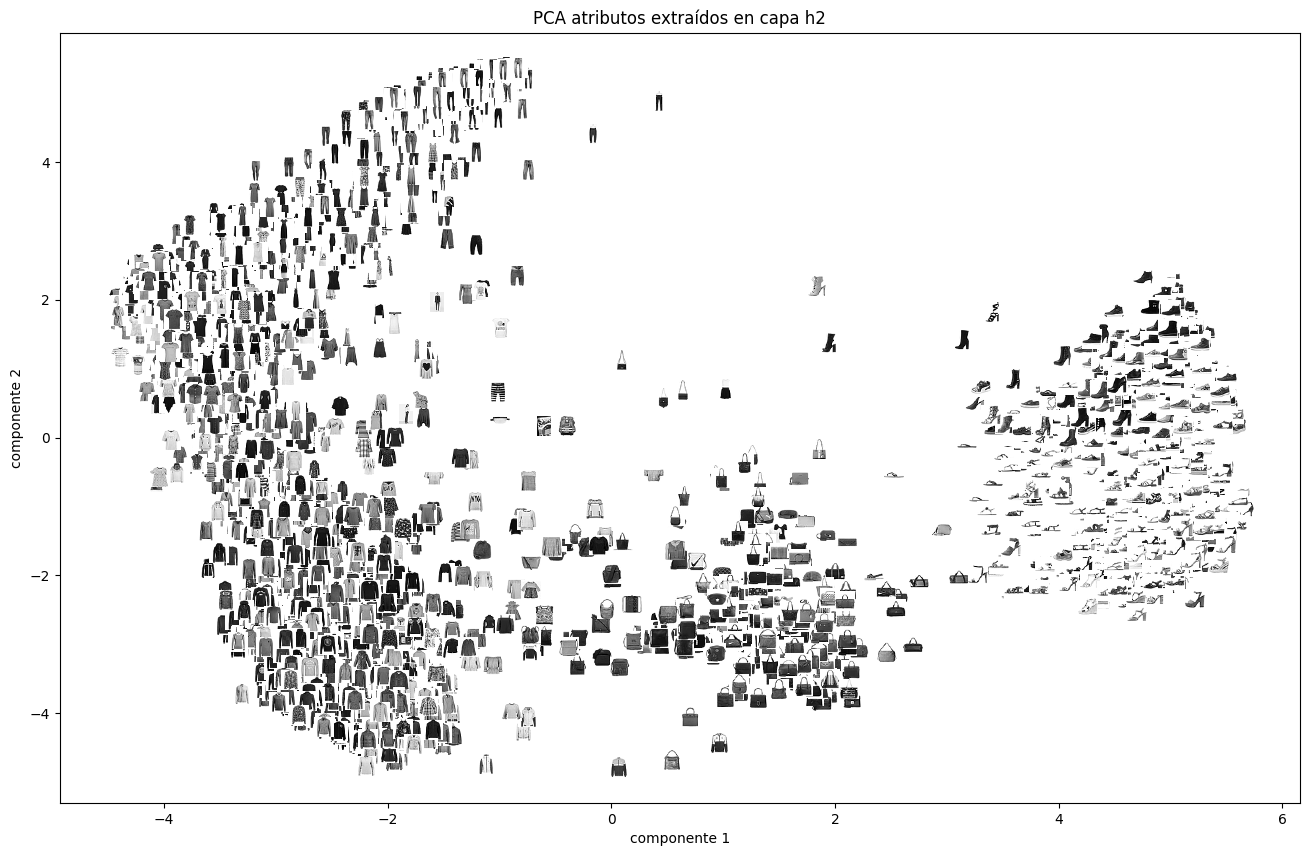

In [ ]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa h2')

### Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

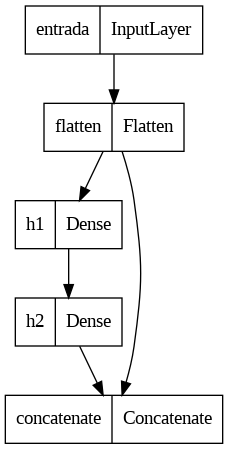

In [ ]:
#crear nuevo modelo con salida parcial
model_C = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('concatenate').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_C) # modelo ya esta ajustado!

In [ ]:
z1 = model_C.predict(Xtest) # salida en concatenate
z1.shape

313/313 [==============================] - 1s 2ms/step


(10000, 834)

In [ ]:
from sklearn.decomposition import PCA
zpca1 = PCA(n_components=2).fit_transform(z1)
zpca1.shape

(10000, 2)

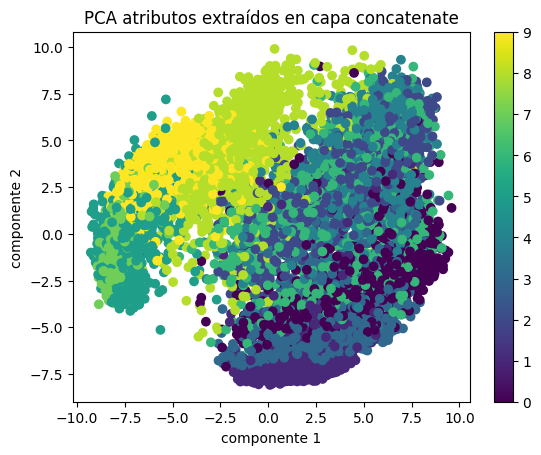

In [ ]:
plt.scatter(zpca1[:,0],zpca1[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concatenate')
plt.show()

Text(0.5, 1.0, 'PCA atributos extraídos en capa concatenate')

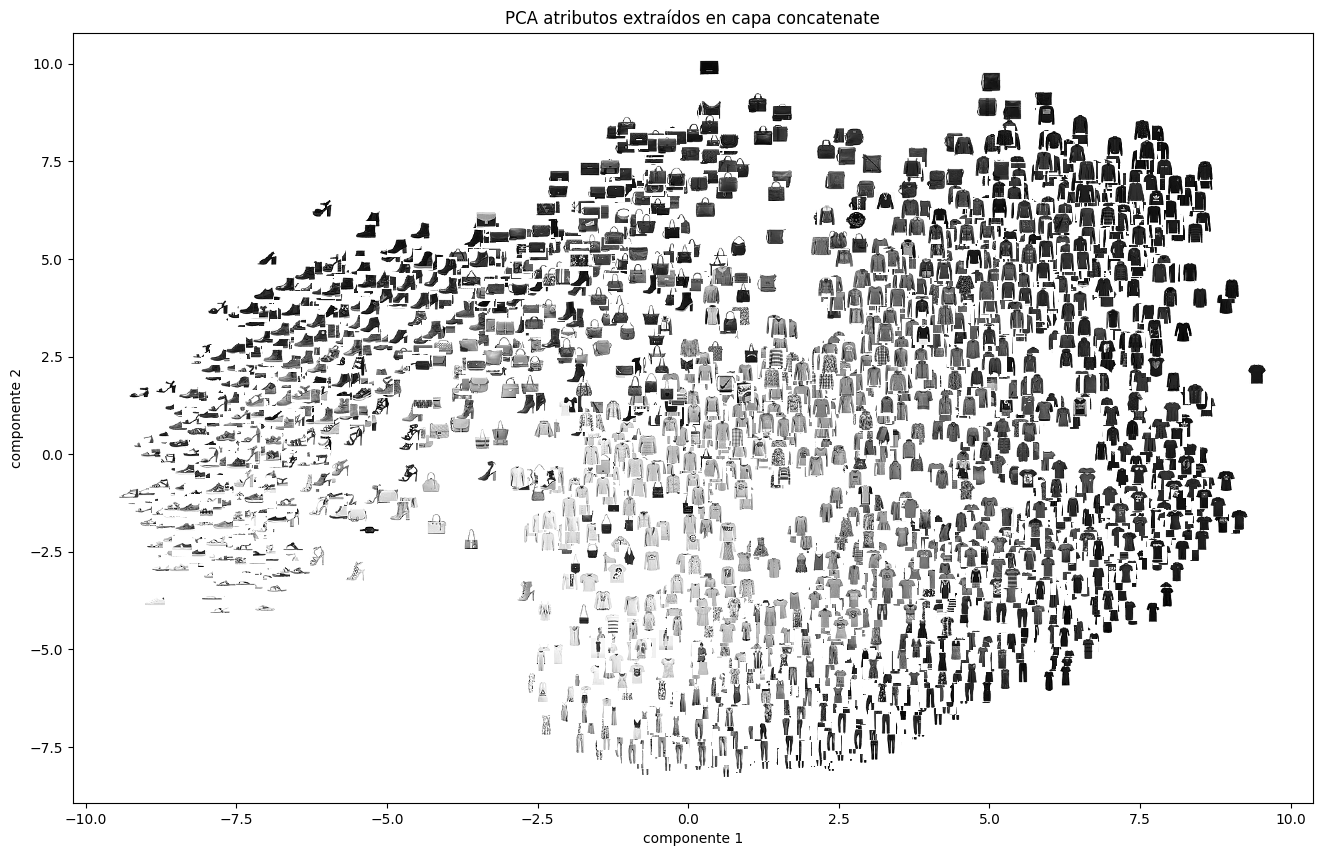

In [ ]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca1[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concatenate')

### Repita el proceso aplicando la técnica de reducción de dimensión t-SNE. Nota: escoja un subconjunto aleatorio de 4000 datos para que el algoritmo t-SNE converja sin problemas de memoría.

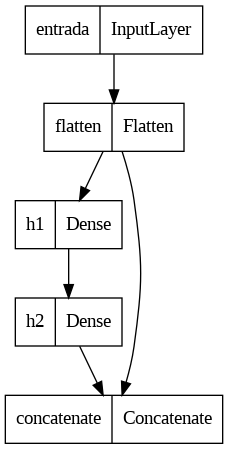

In [ ]:
#crear nuevo modelo con salida parcial
model_D = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('concatenate').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_D) # modelo ya esta ajustado!

In [ ]:
z2 = model_D.predict(Xtest) # salida en concatenate
z2.shape

313/313 [==============================] - 1s 1ms/step


(10000, 834)

In [ ]:
from sklearn.manifold import TSNE
ztsne = TSNE(n_components=2).fit_transform(z2)

In [ ]:
ztsne.shape

(10000, 2)

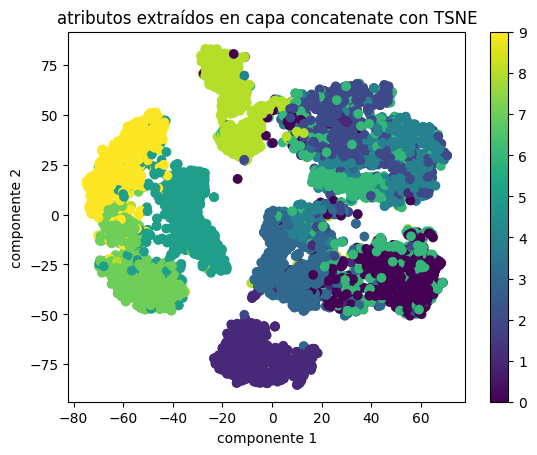

In [ ]:
plt.scatter(ztsne[:,0],ztsne[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('atributos extraídos en capa concatenate con TSNE')
plt.show()

Text(0.5, 1.0, 'atributos extraídos en capa concatenate con TSNE')

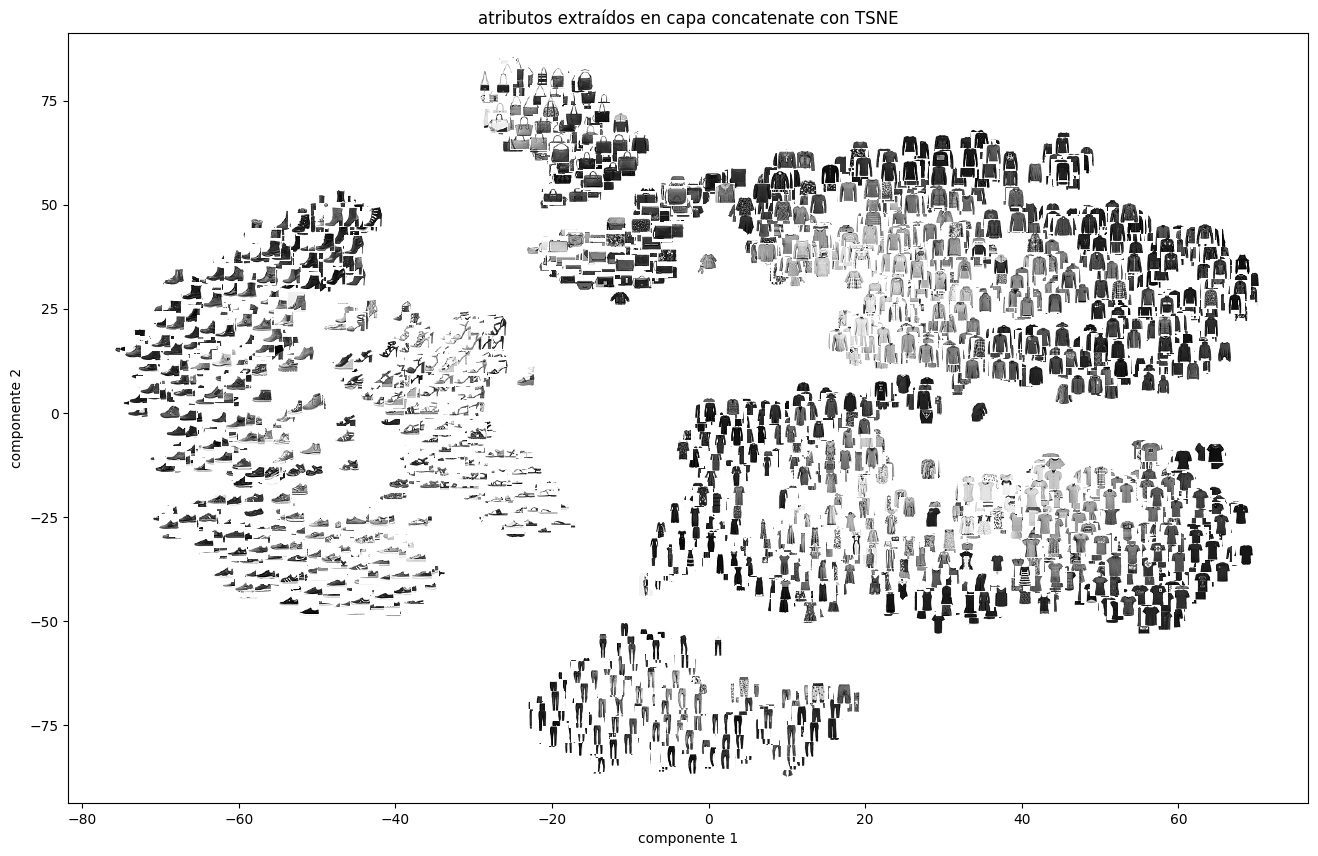

In [ ]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(ztsne[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('atributos extraídos en capa concatenate con TSNE')

### Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno CNNs) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar

In [ ]:
#Ayuda de código:
#cargar fashion mnist o mnist
#(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)


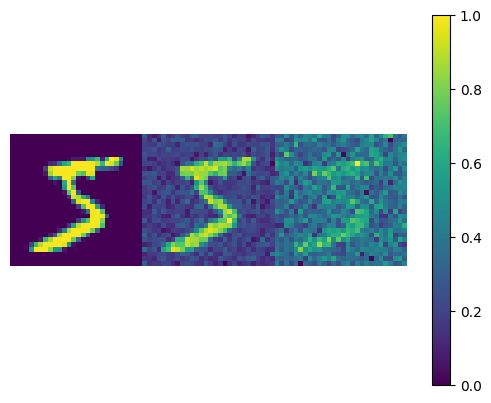

In [ ]:
#crear entradas con y sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]


plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

In [ ]:
#vector de salida par o impar
y_train_B = (y_train % 2)
print(y_train_B[10:])
print(y_train[10:])

[1 1 1 ... 0 1 0]
[3 5 3 ... 2 1 2]


In [ ]:
y_train_B

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [ ]:
y_train

array([5, 0, 4, ..., 2, 1, 2], dtype=uint8)

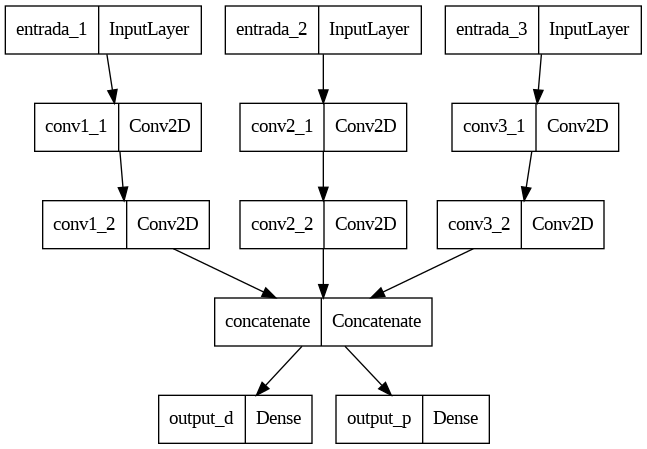

In [ ]:
#arquitectura funcional 2 - Ayuda de código con capas densas - cambiar a capas cnn
from functools import partial
from tensorflow import keras
tf.keras.backend.clear_session()
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

input_1 = tf.keras.layers.Input(shape=(inputs_train[0].shape[1], inputs_train[0].shape[2], inputs_train[0].shape[3]), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(inputs_train[1].shape[1], inputs_train[1].shape[2], inputs_train[0].shape[3]), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(inputs_train[2].shape[1], inputs_train[2].shape[2], inputs_train[0].shape[3]), name='entrada_3')

'''
flatten_1 = tf.keras.layers.Flatten(input_shape=(inputs_train[0].shape[1], inputs_train[0].shape[2]))(input_1)
flatten_2 = tf.keras.layers.Flatten(input_shape=(inputs_train[1].shape[1], inputs_train[1].shape[2]))(input_2)
flatten_3 = tf.keras.layers.Flatten(input_shape=(inputs_train[0].shape[1], inputs_train[2].shape[2]))(input_3)
'''


h1_1 = DefaultConv2D(filters=64, kernel_size=7, name='conv1_1')(input_1)
h2_1 = DefaultConv2D(filters=128, name='conv1_2')(h1_1)
#flatten_1 = tf.keras.layers.Flatten()(h2_1)

h1_2 = DefaultConv2D(filters=64, kernel_size=7, name='conv2_1')(input_2)
h2_2 = DefaultConv2D(filters=128, name='conv2_2')(h1_2)
#flatten_2 = tf.keras.layers.Flatten()(h2_2)

h1_3 = DefaultConv2D(filters=64, kernel_size=7, name='conv3_1')(input_3)
h2_3 = DefaultConv2D(filters=128, name='conv3_2')(h1_3)
#flatten_3 = tf.keras.layers.Flatten()(h2_3)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada

concat = tf.keras.layers.concatenate([h2_1, h2_2, h2_3,])
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(concat)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun3 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun3)

In [ ]:
model_fun3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 entrada_1 (InputLayer)      [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 entrada_2 (InputLayer)      [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 entrada_3 (InputLayer)      [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv1_1 (Conv2D)            (None, 28, 28, 64)           3200      ['entrada_1[0][0]']           
                                                                                              

# Ejercicios planteados en el cuaderno 4 introduccion_RNN.ipynb.

## Ejercicio 1:

**Modelo de Media Móvil (MA):**

El modelo de media móvil es un componente de los modelos autorregresivos integrados de media móvil (ARIMA). En este contexto, "media móvil" se refiere a la media de una serie temporal que se calcula para un conjunto de puntos de datos adyacentes. En un modelo MA, la predicción de la variable dependiente en un punto específico en el tiempo se basa en los errores de predicción pasados, conocidos como innovaciones, que son la diferencia entre los valores observados y los valores predichos en instantes anteriores.

La fórmula básica de un modelo de media móvil de orden q (MA(q)) es:

$[Y_t = c + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \ldots + \theta_q \varepsilon_{t-q},]$

donde:
- $(Y_t)$ es la variable dependiente en el tiempo $(t)$,
- $(c)$ es una constante,
- $(\varepsilon_t)$ es el error en el tiempo $(t)$,
- $(\theta_1, \theta_2, \ldots, \theta_q)$ son los coeficientes de los errores pasados hasta el orden $(q)$.

**Modelo Autorregresivo Integrado de Media Móvil (ARIMA):**

Un modelo ARIMA combina componentes autorregresivos (AR) e integrados (I) con la componente de media móvil (MA). El modelo ARIMA(p, d, q) se define por los parámetros \(p\), \(d\), y \(q\), donde:
- \(p\) es el orden de la parte autorregresiva,
- \(d\) es el orden de diferenciación (número de veces que se diferencia la serie para hacerla estacionaria),
- \(q\) es el orden de la parte de media móvil.

**Relación con Modelos Markovianos:**

Los modelos de media móvil y ARIMA son modelos lineales y estacionarios que asumen que las futuras observaciones dependen de manera lineal de las observaciones pasadas y de los errores pasados. Esta propiedad de depender solo de un número finito de observaciones pasadas es lo que los hace "Markovianos", ya que cumplen con la propiedad de Markov, donde el futuro solo depende del presente, no del pasado más allá de un cierto punto.

En resumen, la relación con modelos Markovianos radica en la dependencia de un número finito de pasos temporales anteriores para predecir el siguiente paso temporal, lo cual es una característica fundamental de los procesos Markovianos.

## Ejercicio 2

In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
#-------------------------------------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
#
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#-------------------------------------------------------------------------------

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, None, 20)          440       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, None, 20)          820       
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 1)                 22        
                                                                 
Total params: 1282 (5.01 KB)
Trainable params: 1282 (5.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


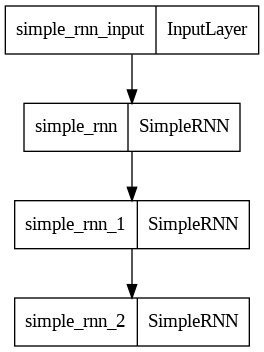

In [ ]:
#-------------------------------------------------------------------------------
# definimos el modelo Deep RNN como un stack de SimpleRNN-----------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1,activation='linear')
    ])
#-------------------------------------------------------------------------------
# pintamos el diagrama de bloques del modelo
model.summary()
tf.keras.utils.plot_model(model)
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# definimos función para generar señales 1D-------------------------------------
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time   = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)
#-------------------------------------------------------------------------------

In [ ]:
#-------------------------------------------------------------------------------
# definimos número de steps y batch_size----------------------------------------
n_steps    = 50
batch_size = 10000
#-------------------------------------------------------------------------------
series           = generate_time_series(batch_size, n_steps + 1)
print('Series dimension:',series.shape)
#-------------------------------------------------------------------------------
# partimos en conjuntos de train/valid/test-------------------------------------
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, y_train.shape)
print('Valid dimensions:',X_valid.shape, y_valid.shape)
print('Test dimensions:',X_test.shape, y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 51, 1)
Train dimensions: (7000, 50, 1) (7000, 1)
Valid dimensions: (2000, 50, 1) (2000, 1)
Test dimensions: (1000, 50, 1) (1000, 1)


In [ ]:
#-------------------------------------------------------------------------------
y_train # vector de salida
#-------------------------------------------------------------------------------

array([[-0.35489398],
       [ 0.11629631],
       [-0.35395944],
       ...,
       [ 0.04946356],
       [-0.26231018],
       [ 0.60062087]], dtype=float32)

In [ ]:
epochs = 20
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 [==============================] - 11s 34ms/step - loss: 0.2486 - val_loss: 0.0275
Epoch 2/20
219/219 [==============================] - 6s 29ms/step - loss: 0.0238 - val_loss: 0.0181
Epoch 3/20
219/219 [==============================] - 7s 33ms/step - loss: 0.0174 - val_loss: 0.0142
Epoch 4/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0139 - val_loss: 0.0119
Epoch 5/20
219/219 [==============================] - 8s 35ms/step - loss: 0.0116 - val_loss: 0.0096
Epoch 6/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0098 - val_loss: 0.0085
Epoch 7/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0085 - val_loss: 0.0077
Epoch 8/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0076 - val_loss: 0.0067
Epoch 9/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0071 - val_loss: 0.0061
Epoch 10/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0062 - val_l

In [ ]:
# Itera sobre las capas del modelo
for layer in model.layers:
    # Obtén los pesos y bias de la capa actual
    weights = layer.get_weights()

    # Verifica si hay pesos y bias
    if len(weights) > 0:
        W, b = weights[0], weights[1]

        # Imprime las formas de los pesos y bias
        print(f"Capa: {layer.name}")
        print(f"   - Tamaño de la matriz de pesos (W): {W.shape}")
        print(f"   - Tamaño del vector de bias (b): {b.shape}")


Capa: simple_rnn
   - Tamaño de la matriz de pesos (W): (1, 20)
   - Tamaño del vector de bias (b): (20, 20)
Capa: simple_rnn_1
   - Tamaño de la matriz de pesos (W): (20, 20)
   - Tamaño del vector de bias (b): (20, 20)
Capa: simple_rnn_2
   - Tamaño de la matriz de pesos (W): (20, 1)
   - Tamaño del vector de bias (b): (1, 1)


## Ejercicio 3:


### Capas Conv1D para Modelar Series Temporales

Las capas Conv1D (convolución unidimensional) son capas de redes neuronales convolucionales diseñadas para procesar datos unidimensionales, como series temporales. Estas capas aplican operaciones de convolución a lo largo de la dimensión temporal de los datos para extraer patrones locales. En el contexto de series temporales, las capas Conv1D pueden ser útiles para identificar patrones temporales locales, como tendencias o patrones repetitivos.

La operación de convolución implica deslizar una ventana (kernel) a lo largo de la secuencia temporal y calcular la suma ponderada de los elementos de la ventana en cada posición. Los pesos del kernel se aprenden durante el entrenamiento de la red neuronal, lo que permite que la red identifique automáticamente patrones importantes en los datos temporales.

### Comparación entre Redes RNN, LSTM, GRU y Conv1D para Predicción de Covid-19 en Colombia

Para realizar la comparación entre las redes RNN, LSTM, GRU y Conv1D en términos de la capacidad de predicción de casos acumulados y nuevos casos de la pandemia Covid-19 en Colombia, se seguirán los siguientes pasos:

1. **Preparación de datos:** Cargar y preprocesar los datos de casos acumulados y nuevos casos de Covid-19 en Colombia.

2. **Definición de modelos:** Crear modelos para cada tipo de red (RNN, LSTM, GRU y Conv1D).

3. **Entrenamiento:** Entrenar los modelos con los datos de entrenamiento.

4. **Evaluación:** Evaluar el rendimiento de cada modelo en términos de MSE y MAE para un horizonte de 1 día y 7 días.


In [ ]:
#Ayuda de código captura base de datos covid-19
#descargar datos covid
!pip install wget
import wget
import pandas as pd
#datos covid19 - mundo
url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
#datos Colombia
#url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"
wget.download(url, 'covid.csv')
Xd = pd.read_csv('covid.csv')
Xd

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [ ]:
#capturar serie Colombia contagios acumulados y nuevos casos
ii = Xd[Xd.columns[1]] == 'Colombia'
#print(np.where(ii)[0][0])
#contagios  acumulados
serie = np.array(Xd.iloc[np.where(ii)[0][0],4:])
#numero contagiados por dia
serie_d = np.append(0,np.diff(serie))


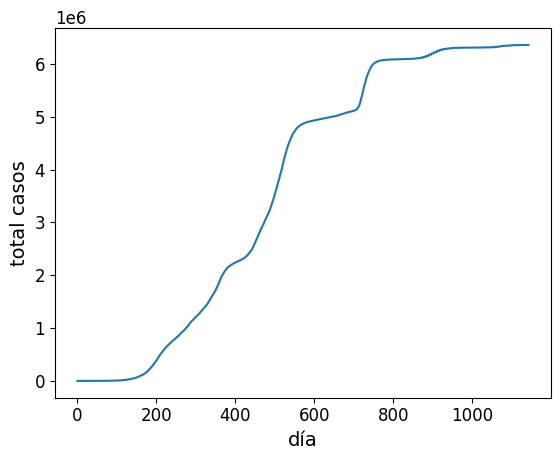

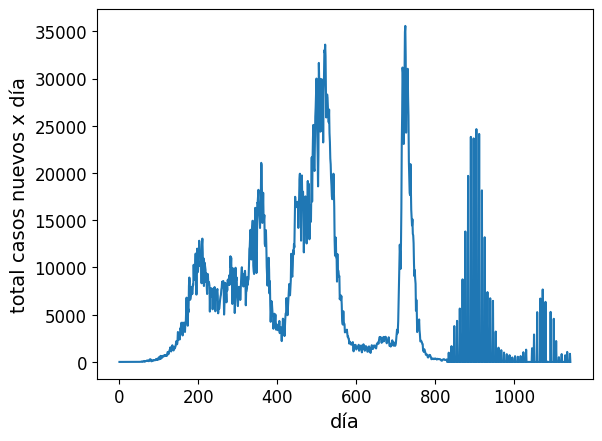

In [ ]:
plt.plot(serie)
plt.xlabel('día')
plt.ylabel('total casos')
plt.show()

plt.plot(serie_d)
plt.xlabel('día')
plt.ylabel('total casos nuevos x día')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError

def preparar_datos(serie, n_pasos):
    X, y = [], []
    for i in range(len(serie)):
        end_ix = i + n_pasos
        if end_ix > len(serie)-1:
            break
        seq_x, seq_y = serie[i:end_ix], serie[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

serie = serie.astype(np.float32)
serie_d = serie_d.astype(np.float32)


# Función para preparar los datos para el entrenamiento de la red
def preparar_datos(serie, n_pasos):
    X, y = [], []
    for i in range(len(serie)):
        end_ix = i + n_pasos
        if end_ix > len(serie)-1:
            break
        seq_x, seq_y = serie[i:end_ix], serie[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Preparación de datos
n_pasos = 5
X, y = preparar_datos(serie, n_pasos)

# Dividir en conjuntos de entrenamiento y prueba
n_test = int(len(X) * 0.2)
X_train, X_test = X[:-n_test], X[-n_test:]
y_train, y_test = y[:-n_test], y[-n_test:]

# Redimensionar X para Conv1D
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Construcción de modelos
def build_model(model_type):
    model = Sequential()
    if model_type == 'SimpleRNN':
        model.add(SimpleRNN(50, activation='relu', input_shape=(n_pasos, 1)))
    elif model_type == 'LSTM':
        model.add(LSTM(50, activation='relu', input_shape=(n_pasos, 1)))
    elif model_type == 'GRU':
        model.add(GRU(50, activation='relu', input_shape=(n_pasos, 1)))
    elif model_type == 'Conv1D':
        model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_pasos, 1)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Entrenamiento y evaluación de los modelos
model_types = ['SimpleRNN', 'LSTM', 'GRU', 'Conv1D']
results = {}

for model_type in model_types:
    print(f"Entrenando modelo {model_type}...")
    model = build_model(model_type)
    model.fit(X_train_cnn if model_type == 'Conv1D' else X_train, y_train, epochs=100, verbose=0)
    y_pred = model.predict(X_test_cnn if model_type == 'Conv1D' else X_test)
    mse = MeanSquaredError()
    mae = MeanAbsoluteError()
    mse.update_state(y_test, y_pred)
    mae.update_state(y_test, y_pred)
    results[model_type] = (mse.result().numpy(), mae.result().numpy())

# Mostrar resultados
for model_type, (mse, mae) in results.items():
    print(f"{model_type} - MSE: {mse}, MAE: {mae}")

Entrenando modelo SimpleRNN...
8/8 [==============================] - 0s 3ms/step
Entrenando modelo LSTM...
8/8 [==============================] - 0s 3ms/step
Entrenando modelo GRU...
8/8 [==============================] - 0s 2ms/step
Entrenando modelo Conv1D...
8/8 [==============================] - 0s 2ms/step
SimpleRNN - MSE: 843960512.0, MAE: 28932.8671875
LSTM - MSE: 659188224.0, MAE: 25514.34375
GRU - MSE: 462594368.0, MAE: 21359.99609375
Conv1D - MSE: 160751328.0, MAE: 12499.8154296875
